## Regularization

### Ridge and Lasso Regression

Regularization is implemented to avoid overfitting of the data, expecially when there is a large variance between train and test set performance. 

Two common types of reguression/regularization in Machine Learning. <br>
<img src="./rsc/Regularization.png" width="600" height="800">

* **Ridge regression (L2 regularization)**:
Ridge regression puts a constraint on the coefficients by introducing a penality factors. This encourages all coefficients to reduce in size by an amount proportional to their values and reduces model complexity by shrinking large weights toward zero. Ridge regression decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient been zero rather only minimize it.

* **Lasso regression (L1 regularization)**: Lasso is used in feature selection using a shrinkage method. Lasso in comaprison to ridge will shrink the coefficients towards a zero-value allowing the model to remove less important features in a dataset. <br>

    Lasso is short for **L**east **A**bsolute **S**hrinkage and **S**election **O**perator.


### L2 & L1 Regularization in deep learning

For L2 (popular regularization):
    $$Costfucntion = Loss+\frac{\lambda}{2m}*\sum{||w||^2}$$
For L1:
    $$Costfucntion = Loss+\frac{\lambda}{2m}*\sum{||w||}$$
Due to the addition of this regularization term, the values of weight matrices decrease because it assuems that a neural network with smaller weight matrices leads to simpler models. Therefor, it will also reduce overfitting.

In [36]:
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, Subset
import torchvision
from torchvision import transforms

%load_ext autoreload 
%autoreload 2
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
X = torch.tensor([[1.,2.,3.],[4.,5.,6.]])

In [5]:
torch.linalg.norm(X)

tensor(9.5394)

In [17]:
print(torch.sqrt(torch.sum(X**2)))
print(torch.sqrt(torch.sum(X**2))==torch.linalg.norm(X))

tensor(9.5394)
tensor(True)


#### example of usage

In [18]:
# add this in learn class to update loss
l2_reg = torch.tensor(0.)
for name, param in conv_model.named_parameters():
    # print(name, param)
    if 'weight' in name:
        l2_reg += torch.linalg.norm(param)**2
# loss += (weight_decay / (2*m)) * l2_reg

#### L2 regulariztion in pytorch

In [19]:
optim.SGD(conv_model.parameters(), lr=0.03, weight_decay=0.01)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.03
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0.01
)

### Effect of Regularization on Loss

In [32]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.4914,0.4822,0.4465), std=(0.2023,0.1994,0.2010))
])
classes = ('plane', 'car', 'bird', 'cat','deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')
train_dataset=torchvision.datasets.CIFAR10(root="./data/cifar10_data", train=True, download=True,transform=transform)
val_dataset=torchvision.datasets.CIFAR10(root="./data/cifar10_data", train=False, download=True,transform=transform)

train_dataset_sub = Subset(train_dataset, range(2000))
val_dataset_sub = Subset(val_dataset, range(1000))

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=6)
val_loader = DataLoader(val_dataset, batch_size=128, num_workers=6)


Files already downloaded and verified
Files already downloaded and verified


In [50]:
def get_conv_model():
    return nn.Sequential(
        # 1x30x30
        nn.Conv2d(in_channels=3,out_channels=4, kernel_size=3, stride=2,padding=1), 
        nn.ReLU(),
        # 4x15x15
        nn.Conv2d(in_channels=4,out_channels=8, kernel_size=3, stride=2,padding=1), 
        nn.ReLU(),
        # 8x7x7
        nn.Conv2d(in_channels=8,out_channels=16, kernel_size=3, stride=2,padding=1), 
        nn.ReLU(),
        # 16x4x4
        nn.Conv2d(in_channels=16,out_channels=32, kernel_size=3, stride=2,padding=1), 
        nn.ReLU(),
        # 32x2x2

        # gap layer: 32x2x2 -> 32x1x1
        nn.AdaptiveAvgPool2d(1),
    
        nn.Flatten(),
        nn.Linear(32,10)
        )

conv_model = get_conv_model()
conv_model_l2 = get_conv_model()

opt =optim.SGD(conv_model.parameters(), lr=0.03)
opt_l2 =optim.SGD(conv_model_l2.parameters(), lr=0.03, weight_decay=0.001)

num_epoch = 30
train_losses, val_losses, val_accuracies = utils.learn(conv_model, train_loader, val_loader, opt, F.cross_entropy, num_epoch=num_epoch)
train_losses_l2, val_losses_l2, val_accuracies_l2= utils.learn(conv_model_l2, train_loader, val_loader, opt_l2, F.cross_entropy, num_epoch=num_epoch)

epoch: 0: train error: 2.301588617017507, validation error: 2.29025809070732, validation accuracy: 0.13212025316455697


epoch: 1: train error: 2.208360404309714, validation error: 2.0976805430424363, validation accuracy: 0.2579113924050633


epoch: 2: train error: 2.0338449252535926, validation error: 1.9673059137561653, validation accuracy: 0.29647943037974683


epoch: 3: train error: 1.9554401569049378, validation error: 1.9066181077232844, validation accuracy: 0.30508306962025317


epoch: 4: train error: 1.8958428878613445, validation error: 1.8585276709327214, validation accuracy: 0.31329113924050633


epoch: 5: train error: 1.8304717370006434, validation error: 1.7695792581461653, validation accuracy: 0.36451740506329117


epoch: 6: train error: 1.7689631290143104, validation error: 1.7411710883997664, validation accuracy: 0.3747033227848101


epoch: 7: train error: 1.7205882285866896, validation error: 1.6562813897676105, validation accuracy: 0.4085245253164557


epoch: 8: train error: 1.6692893041674133, validation error: 1.6355749911899808, validation accuracy: 0.41663370253164556


epoch: 9: train error: 1.6188788545101196, validation error: 1.5699676305432864, validation accuracy: 0.44096123417721517


epoch: 10: train error: 1.5774815527679364, validation error: 1.5420908943007263, validation accuracy: 0.45154272151898733


epoch: 11: train error: 1.5396557573772147, validation error: 1.5128467294234265, validation accuracy: 0.46528876582278483


epoch: 12: train error: 1.5099019827440268, validation error: 1.4870222203339203, validation accuracy: 0.4630142405063291


epoch: 13: train error: 1.4844843158331673, validation error: 1.4709847305394426, validation accuracy: 0.4747824367088608


epoch: 14: train error: 1.4631500445363466, validation error: 1.454613910445684, validation accuracy: 0.4780458860759494


epoch: 15: train error: 1.446406462308391, validation error: 1.4310917959937566, validation accuracy: 0.4930775316455696


epoch: 16: train error: 1.4247982026366017, validation error: 1.4063870891740051, validation accuracy: 0.4970332278481013


epoch: 17: train error: 1.4086099527680966, validation error: 1.4392085286635388, validation accuracy: 0.49149525316455694


epoch: 18: train error: 1.3939729492987514, validation error: 1.456409691255304, validation accuracy: 0.4764636075949367


epoch: 19: train error: 1.3800027864363493, validation error: 1.356584387489512, validation accuracy: 0.5110759493670886


epoch: 20: train error: 1.3597450978920589, validation error: 1.3385295188879665, validation accuracy: 0.5190862341772152


epoch: 21: train error: 1.3492111485937368, validation error: 1.4174455841885338, validation accuracy: 0.4944620253164557


epoch: 22: train error: 1.334177134287022, validation error: 1.3229733433904527, validation accuracy: 0.5278876582278481


epoch: 23: train error: 1.3215079795369102, validation error: 1.322792584383035, validation accuracy: 0.5284810126582279


epoch: 24: train error: 1.3100296454051572, validation error: 1.3454913051822517, validation accuracy: 0.5133504746835443


epoch: 25: train error: 1.3009735879385869, validation error: 1.3325528328931784, validation accuracy: 0.5209651898734177


epoch: 26: train error: 1.2885744678394875, validation error: 1.3103201494941228, validation accuracy: 0.5313488924050633


epoch: 27: train error: 1.2835667770536965, validation error: 1.3446750052367584, validation accuracy: 0.5120648734177216


epoch: 28: train error: 1.2716999236884934, validation error: 1.2983070008362396, validation accuracy: 0.5282832278481012


epoch: 29: train error: 1.2676775644502372, validation error: 1.2914254363579085, validation accuracy: 0.5369857594936709


epoch: 0: train error: 2.3048008665099475, validation error: 2.3018274699585346, validation accuracy: 0.09958465189873418


epoch: 1: train error: 2.297365668484622, validation error: 2.2814454006243357, validation accuracy: 0.16257911392405064


epoch: 2: train error: 2.1435648715099713, validation error: 2.049883410900454, validation accuracy: 0.22952927215189872


epoch: 3: train error: 2.0181645295199226, validation error: 1.9398468008524254, validation accuracy: 0.2991495253164557


epoch: 4: train error: 1.8949652885841897, validation error: 1.8228569498545006, validation accuracy: 0.3449367088607595


epoch: 5: train error: 1.8068870016376075, validation error: 1.7449866035316564, validation accuracy: 0.3738132911392405


epoch: 6: train error: 1.7416577211121465, validation error: 1.726001007647454, validation accuracy: 0.36787974683544306


epoch: 7: train error: 1.688521551354157, validation error: 1.670112617408173, validation accuracy: 0.39655854430379744


epoch: 8: train error: 1.6385987091552265, validation error: 1.6278211813938768, validation accuracy: 0.40971123417721517


epoch: 9: train error: 1.602802592775096, validation error: 1.5751812910731835, validation accuracy: 0.42929193037974683


epoch: 10: train error: 1.567145318631321, validation error: 1.556795073460929, validation accuracy: 0.43552215189873417


epoch: 11: train error: 1.538308040260354, validation error: 1.50388847574403, validation accuracy: 0.45144382911392406


epoch: 12: train error: 1.5117926070147463, validation error: 1.5632143337515336, validation accuracy: 0.43888449367088606


epoch: 13: train error: 1.4946604034175044, validation error: 1.4914214429976065, validation accuracy: 0.4521360759493671


epoch: 14: train error: 1.47279487881819, validation error: 1.523282675803462, validation accuracy: 0.4549050632911392


epoch: 15: train error: 1.4569847663040356, validation error: 1.442798735220221, validation accuracy: 0.4747824367088608


epoch: 16: train error: 1.4387137258754057, validation error: 1.439832943904249, validation accuracy: 0.4755735759493671


epoch: 17: train error: 1.4223627318506655, validation error: 1.4095797236961654, validation accuracy: 0.4880340189873418


epoch: 18: train error: 1.4111210821229783, validation error: 1.4406003001370007, validation accuracy: 0.486748417721519


epoch: 19: train error: 1.3966955135545462, validation error: 1.385497043404398, validation accuracy: 0.49386867088607594


epoch: 20: train error: 1.3832969662478514, validation error: 1.4355422379095344, validation accuracy: 0.48823180379746833


epoch: 21: train error: 1.371894916914918, validation error: 1.3629636055306544, validation accuracy: 0.5122626582278481


epoch: 22: train error: 1.3614966933379697, validation error: 1.3965430878385712, validation accuracy: 0.5020767405063291


epoch: 23: train error: 1.349217036800921, validation error: 1.3648032749755472, validation accuracy: 0.5105814873417721


epoch: 24: train error: 1.340368035199392, validation error: 1.354702530027945, validation accuracy: 0.5175039556962026


epoch: 25: train error: 1.328859111537104, validation error: 1.4420334991020491, validation accuracy: 0.47933148734177217


epoch: 26: train error: 1.3177707256258602, validation error: 1.344061496891553, validation accuracy: 0.517998417721519


epoch: 27: train error: 1.3097898533277195, validation error: 1.3474076820325247, validation accuracy: 0.5204707278481012


epoch: 28: train error: 1.3020588519323208, validation error: 1.3070484143269212, validation accuracy: 0.5311511075949367


epoch: 29: train error: 1.2931108008260312, validation error: 1.3490713019914264, validation accuracy: 0.5105814873417721


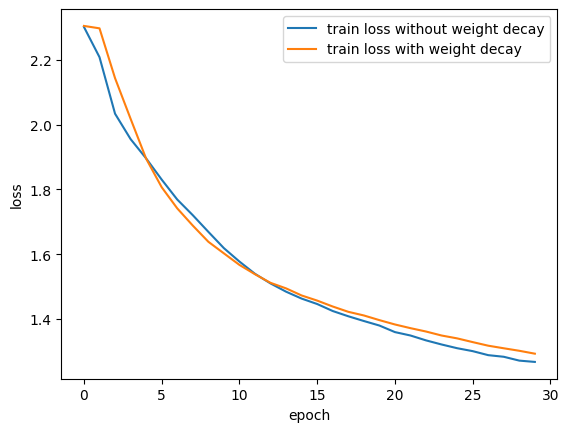

In [51]:
plt.plot(train_losses, label='train loss without weight decay')
plt.plot(train_losses_l2, label='train loss with weight decay')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

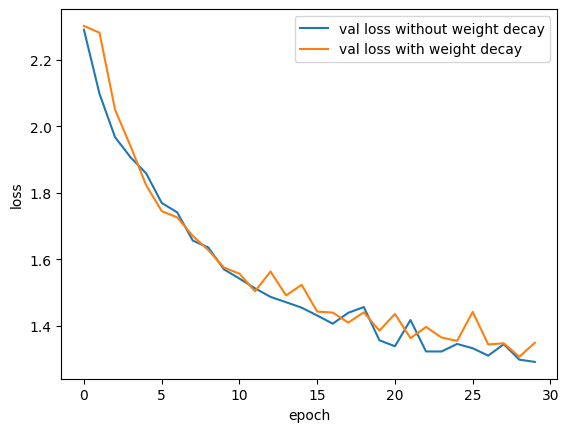

In [52]:
plt.plot(val_losses, label='val loss without weight decay')
plt.plot(val_losses_l2, label='val loss with weight decay')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

### Dropout

Dropout is a regularization technique used to prevent overfitting in deep learning. Randomly some fraction (defined by probability $p$) of a layer's input is deactivated or dropped out during training. Hence, all the forward and backwards connections with a dropped node are temporarily removed, thus creating a new network architecure out of the parent network. Dropout effectively reduces overfitting and improves generalization error in deep neural network. <br>

You could also think about dropout as creating a kind of *ensemble* of networks.<br> 

Schematic image:
<img src="./rsc/dropout.gif" width="600" height="800">


Dropout is usually appliced in FC layers.

class `torch.nn.Dropout(p=0.5, inplace=False)`[source] <br>

>During training, randomly zeroes some of the elements of the input tensor with probability p.

>The zeroed elements are chosen independently for each forward call and are sampled from a Bernoulli distribution.

>Each channel will be zeroed out independently on every forward call.

>This has proven to be an effective technique for regularization and preventing the co-adaptation of neurons as described in the paper Improving neural networks by preventing co-adaptation of feature detectors .

**Parameters**:
* **p** (float) – probability of an element to be zeroed. Default: 0.5

* **inplace** (bool) – If set to True, will do this operation in-place. Default: False

Example:
```python
m = nn.Dropout(p=0.2)
input = torch.randn(20, 16)
output = m(input)
```


*reference*: [*Dropout*](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)

### forward operation with dropout

&emsp;$Z^{[l]}=A^{[l]}*W^{[l]T} + B^{[l]}$ <br>

&emsp;$A^{[l]}=\sigma(Z^{[l]})$ <br>

dropout with probability of $p$,

&emsp;$D^{[l]}\sim Bernoulli(1-p)$

&emsp;$A^{[l]} = A^{[l]} \odot D^{[l]}$

&emsp;$A^{[l]} = \frac{A^{[l]}}{1-p}$

Idea of dropout

`torch.rand` Returns random numbers from a uniform distribution on the interval [0,1). Using random numbers as a probability mask. 

If a value is smaller than 1-p, it returns True. If not, it returns False.

Mutiplication of the mask with a tensor matrix randomly zeros out a fraction of probability of $p$ neurons. 

```python
X= torch.rand(2,2) 
print(X)
# tensor([[0.5067, 0.8568],
#        [0.1400, 0.2250]])
        
p =0.2  # 20%
mask = X<1-p

print(mask)
# tensor([[ True, False],
#        [ True,  True]])

print(mask * X)
# tensor([[0.5067, 0.0000],
#         [0.1400, 0.2250]])
```

In [66]:
def dropout(X, drop_p):
    keep_p = 1- drop_p
    mask = torch.rand(X.shape) < keep_p
    return X * mask / keep_p

In [75]:
p = 0.3
X = torch.randn((100,100))
dropped_X = dropout(X,p)

In [77]:
def relu(X):
    return torch.clamp(X, min=0)

relu_out = relu(X)
keep_p = 1 - p
mask = torch.rand(X.shape) < keep_p
print((relu_out * mask).sum() / keep_p)
print(relu_out.sum())

tensor(3974.7949)
tensor(3964.6006)


In [74]:
model = nn.Sequential(
    nn.Linear(64,20),
    nn.ReLU(),
    nn.Dropout(p=0.04),
    nn.Linear(20, 10)
)
model

Sequential(
  (0): Linear(in_features=64, out_features=20, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.04, inplace=False)
  (3): Linear(in_features=20, out_features=10, bias=True)
)